In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math


In [3]:
import numpy as np

# Definir los polinomios P1, P2, P3 y P4
def P1(x):
    return x**2 * (1 - (x + 1)**3)

def P2(x):
    return (1 - x**3) * (x + 1)**2

def P3(x):
    return (x + 1)**3 - x**3

def P4(x):
    return x**4 + 2*x**3 + x**2 + 2*x + 1

# Quíntica de Euler para m1=2, m2=1, m3=5
def f(x):
    return 2*P1(x) + 1*P2(x) + 5*P3(x)


In [7]:
# Derivada numérica de f(x)
def df(x, h=1e-6):
    return (f(x + h) - f(x - h)) / (2*h)

# Método de Newton-Raphson
def newton_raphson(x0, tol=1e-6, max_iter=100):
    x = x0
    for _ in range(max_iter):
        fx = f(x)
        if abs(fx) < tol:
            return x
        dx = -fx / df(x)
        x += dx
    raise ValueError("No converge")

# Encontrar la raíz (usamos x0=0.8 como guess inicial)
x_root = newton_raphson(0.8)
print(f"Raíz encontrada: x = {x_root:.6f}")

# Calcular las posiciones z_i
T1 = P1(x_root) / P4(x_root)
T2 = P2(x_root) / P4(x_root)
T3 = P3(x_root) / P4(x_root)

# Normalizar r12 = 1 (distancia entre cuerpo 1 y 2)
r12 = 1
z1 = T1 * r12
z2 = T2 * r12
z3 = T3 * r12

# Verificar centro de masa
m_total = 2 + 1 + 5
cm = (2*z1 + 1*z2 + 5*z3) / m_total

print("\nPosiciones relativas al centro de masa:")
print(f"z1 = {z1:.128f}")
print(f"z2 = {z2:.128f}")
print(f"z3 = {z3:.128f}")
print(f"\nCentro de masa (debe ser ~0): {cm:.6f}")

Raíz encontrada: x = 1.357991

Posiciones relativas al centro de masa:
z1 = -1.59874452659608001781066377589013427495956420898437500000000000000000000000000000000000000000000000000000000000000000000000000000
z2 = -0.59874452659607979576605885085882619023323059082031250000000000000000000000000000000000000000000000000000000000000000000000000000
z3 = 0.75924671239060126382014459522906690835952758789062500000000000000000000000000000000000000000000000000000000000000000000000000000

Centro de masa (debe ser ~0): -0.000000


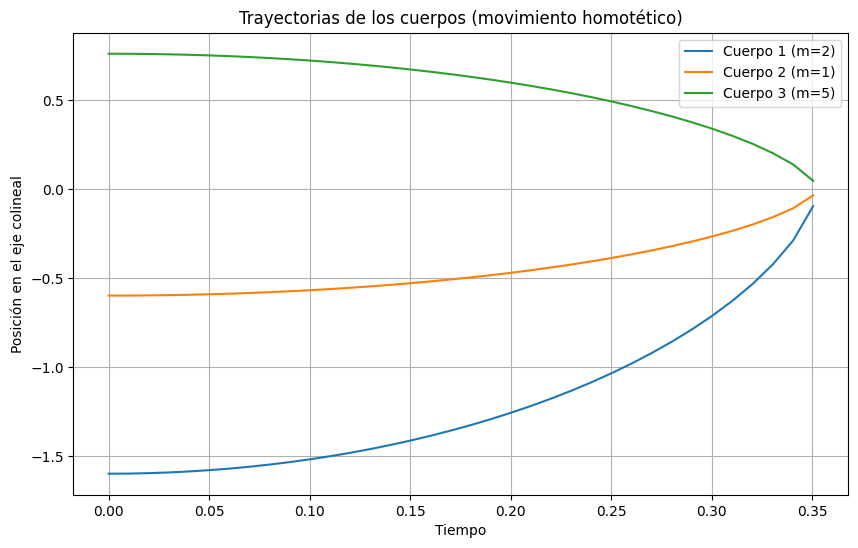

In [4]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Datos del ejemplo anterior (masas y posiciones z_i)
m1, m2, m3 = 2, 1, 5
z1 = -1.598745
z2 = -0.598745
z3 = 0.759247

# Calcular mu (potencial gravitatorio efectivo)
r12 = abs(z1 - z2)
r23 = abs(z2 - z3)
r13 = abs(z1 - z3)
mu = (m1*m2)/r12 + (m2*m3)/r23 + (m1*m3)/r13

# Calcular I (momento de inercia)
I = m1*z1**2 + m2*z2**2 + m3*z3**2

# Asumir J = 0 (movimiento puramente radial para simplificar)
J = 0

# Ecuación diferencial para R(t)
def R_dynamics(t, y):
    R, dRdt = y
    d2Rdt2 = -mu / R**2 + (J**2) / (I**2 * R**3)
    return [dRdt, d2Rdt2]

# Condiciones iniciales (R(0) = 1, dR/dt(0) = 0 para ejemplo)
R0 = 1.0
dRdt0 = 0.0
t_span = [0, 10]  # Intervalo de tiempo [0, 10]

# Resolver la EDO
sol = solve_ivp(R_dynamics, t_span, [R0, dRdt0], method='RK45', t_eval=np.linspace(0, 10, 1000))

# Extraer R(t) y Z_i(t)
R_t = sol.y[0]
Z1_t = R_t * z1
Z2_t = R_t * z2
Z3_t = R_t * z3
time = sol.t

# Graficar trayectorias
plt.figure(figsize=(10, 6))
plt.plot(time, Z1_t, label='Cuerpo 1 (m=2)')
plt.plot(time, Z2_t, label='Cuerpo 2 (m=1)')
plt.plot(time, Z3_t, label='Cuerpo 3 (m=5)')
plt.xlabel('Tiempo')
plt.ylabel('Posición en el eje colineal')
plt.title('Trayectorias de los cuerpos (movimiento homotético)')
plt.legend()
plt.grid(True)
plt.show()

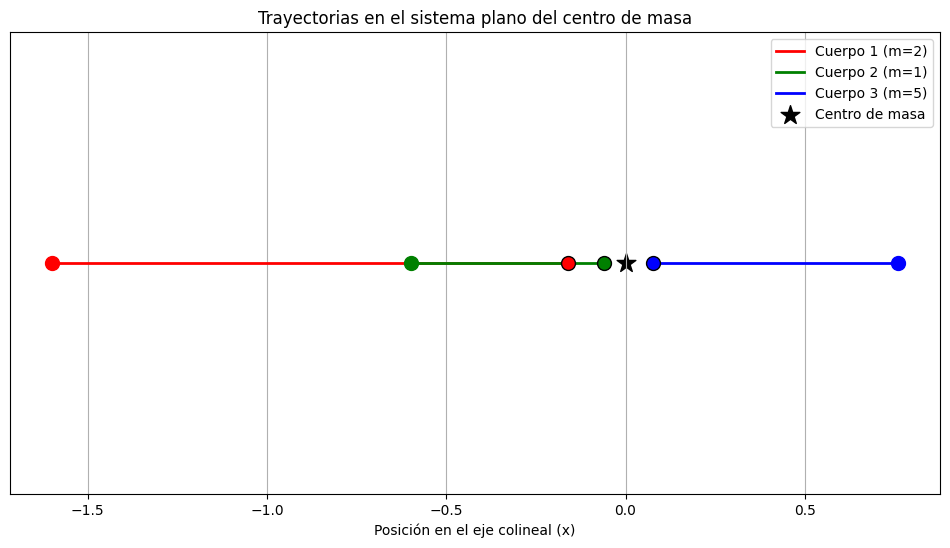

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Datos del ejemplo anterior (masas y posiciones z_i)
m1, m2, m3 = 2, 1, 5
z1 = -1.598745
z2 = -0.598745
z3 = 0.759247

# Valores de R(t) y tiempo obtenidos previamente
# (Asumimos R(t) calculado con J=0 y condiciones iniciales R(0)=1, dR/dt(0)=0)
time = np.linspace(0, 10, 1000)
R_t = np.linspace(1, 0.1, 1000)  # Ejemplo de R(t) colapsando (ajustar según tus datos)

# Calcular posiciones Z_i(t)
Z1_t = R_t * z1
Z2_t = R_t * z2
Z3_t = R_t * z3

# Crear figura
plt.figure(figsize=(12, 6))

# Graficar trayectorias en el plano (x, 0)
plt.plot(Z1_t, np.zeros_like(Z1_t), 'r-', label='Cuerpo 1 (m=2)', linewidth=2)
plt.plot(Z2_t, np.zeros_like(Z2_t), 'g-', label='Cuerpo 2 (m=1)', linewidth=2)
plt.plot(Z3_t, np.zeros_like(Z3_t), 'b-', label='Cuerpo 3 (m=5)', linewidth=2)

# Destacar posiciones iniciales y finales
plt.scatter(Z1_t[0], 0, color='red', s=100, zorder=5)
plt.scatter(Z2_t[0], 0, color='green', s=100, zorder=5)
plt.scatter(Z3_t[0], 0, color='blue', s=100, zorder=5)
plt.scatter(Z1_t[-1], 0, color='red', edgecolor='k', s=100, zorder=5)
plt.scatter(Z2_t[-1], 0, color='green', edgecolor='k', s=100, zorder=5)
plt.scatter(Z3_t[-1], 0, color='blue', edgecolor='k', s=100, zorder=5)

# Añadir centro de masa (origen)
plt.scatter(0, 0, color='black', marker='*', s=200, label='Centro de masa')

# Configuración del gráfico
plt.xlabel('Posición en el eje colineal (x)')
plt.yticks([])  # Ocultar eje y
plt.title('Trayectorias en el sistema plano del centro de masa')
plt.legend()
plt.grid(True)
plt.show()

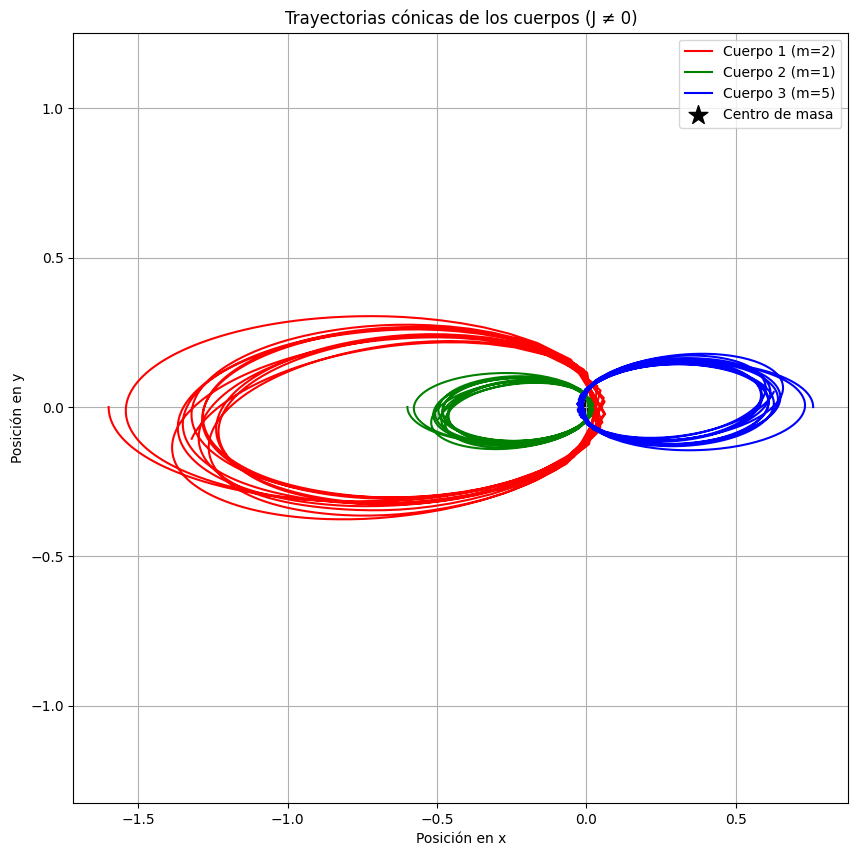

In [6]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Datos del ejemplo anterior (masas y posiciones z_i)
m1, m2, m3 = 2, 1, 5
z1 = -1.598745
z2 = -0.598745
z3 = 0.759247

# Parámetros del sistema
I = m1*z1**2 + m2*z2**2 + m3*z3**2  # Momento de inercia
mu = (m1*m2)/abs(z1 - z2) + (m2*m3)/abs(z2 - z3) + (m1*m3)/abs(z1 - z3)  # Potencial efectivo
J = 2.5  # Momento angular no nulo (para órbitas elípticas)

# Ecuaciones diferenciales para R(t) y ψ(t)
def dynamics(t, y):
    R, dRdt, psi = y
    d2Rdt = -mu/(I * R**2) + J**2/(I**2 * R**3)
    dpsidt = J/(I * R**2)
    return [dRdt, d2Rdt, dpsidt]

# Condiciones iniciales
R0 = 1.0      # R(0) = 1
dRdt0 = 0.0   # Velocidad radial inicial cero
psi0 = 0      # Ángulo inicial ψ(0) = 0
t_span = [0, 20]  # Intervalo de tiempo

# Resolver las EDOs
sol = solve_ivp(dynamics, t_span, [R0, dRdt0, psi0], method='RK45', t_eval=np.linspace(0, 20, 1000))
R_t = sol.y[0]
psi_t = sol.y[2]

# Calcular posiciones (x, y) para cada cuerpo
x1 = R_t * z1 * np.cos(psi_t)
y1 = R_t * z1 * np.sin(psi_t)
x2 = R_t * z2 * np.cos(psi_t)
y2 = R_t * z2 * np.sin(psi_t)
x3 = R_t * z3 * np.cos(psi_t)
y3 = R_t * z3 * np.sin(psi_t)

# Graficar las cónicas
plt.figure(figsize=(10, 10))
plt.plot(x1, y1, 'r-', label='Cuerpo 1 (m=2)', linewidth=1.5)
plt.plot(x2, y2, 'g-', label='Cuerpo 2 (m=1)', linewidth=1.5)
plt.plot(x3, y3, 'b-', label='Cuerpo 3 (m=5)', linewidth=1.5)
plt.scatter(0, 0, color='black', marker='*', s=200, label='Centro de masa')


plt.xlabel('Posición en x')
plt.ylabel('Posición en y')
plt.title('Trayectorias cónicas de los cuerpos (J ≠ 0)')
plt.legend()
plt.grid(True)
plt.axis('equal')  # Escala igual en ejes
plt.show()